# project-spotify song popularity prediction

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
df=pd.read_csv("C:\\Users\\asus\\Pictures\\Screenshots\\SpotifyFeatureslast2.csv")

C:\Users\asus\AppData\Local\Temp\ipykernel_4180\3776498339.py:1: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\asus\\Pictures\\Screenshots\\SpotifyFeatureslast2.csv")


In [218]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373.0,0.910,0.000,C#,0.346,-1.828,Major,#,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373.0,0.737,0.000,F#,0.151,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.240,170267.0,0.131,0.000,C,0.103,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0362,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625.0,0.225,0.123,F,0.202,-21.150,Major,#,140.576,04-Apr,0.390


In [219]:
df.shape

(232726, 18)

In [220]:
df.isna().any().any()

True

In [221]:
df.isna().sum()

genre                0
artist_name          0
track_name           0
track_id             0
popularity           0
acousticness        11
danceability         5
duration_ms         13
energy              24
instrumentalness     0
key                  0
liveness             0
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
dtype: int64

# data cleaning

In [222]:
df["acousticness"] = df.acousticness.fillna(method = "bfill")

In [223]:
df["acousticness"].isna().any().any()

False

In [224]:
df["danceability"] = df.danceability.fillna(method = "bfill")

In [225]:
df["danceability"].isna().any().any()

False

In [226]:
df["duration_ms"] = df.duration_ms.fillna(method = "ffill")

In [227]:
df["duration_ms"].isna().any().any()

False

In [228]:
df["energy"] = df.energy.fillna(method = "ffill")

In [229]:
df["energy"].isna().any().any()

False

In [230]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [231]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373.0,0.910,0.000,C#,0.346,-1.828,Major,#,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373.0,0.737,0.000,F#,0.151,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.240,170267.0,0.131,0.000,C,0.103,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0362,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625.0,0.225,0.123,F,0.202,-21.150,Major,#,140.576,04-Apr,0.390


In [232]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness             object
loudness            float64
mode                 object
speechiness          object
tempo               float64
time_signature       object
valence             float64
dtype: object

In [233]:
df.liveness.unique()

array([0.346, 0.151, 0.103, ..., '0.29', '#', '0.0747'], dtype=object)

In [234]:
df.loc[df["liveness"]=="#"]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232705,Soul,Irma Thomas,Ruler of My Heart,6xiiZYr0zysI7wbEQlbpei,40,0.7040,0.380,155067.0,0.160,0.0,B,#,-17.717,Major,0.0332,179.284,03-Apr,0.270
232709,Soul,Joss Stone,Some Kind Of Wonderful,1sQMwuozNCmF811OgjTWIA,42,0.0714,0.837,236133.0,0.541,0.0,C,#,-5.068,Major,0.136,103.971,04-Apr,0.654


In [235]:
df.liveness.replace("#",np.nan,inplace=True)
df["liveness"] = df.liveness.fillna(method="bfill")

In [236]:
df.liveness.unique()

array([0.346, 0.151, 0.103, ..., '0.0752', '0.29', '0.0747'], dtype=object)

In [237]:
df["liveness"] =df["liveness"].astype(float)

In [238]:
df["speechiness"].unique()

array(['#', '0.0868', '0.0362', ..., 0.627, 0.687, 0.0227], dtype=object)

In [239]:
df.loc[df["speechiness"]=="#"]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373.0,0.910,0.000,C#,0.346,-1.828,Major,#,166.969,04-Apr,0.814
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625.0,0.225,0.123,F,0.202,-21.150,Major,#,140.576,04-Apr,0.390
17,Movie,Bernard Minet,Ultra Man 80,0x8xSaoSfQkOYUnG1nbga0,3,0.488,0.744,178107.0,0.953,0.000,E,0.453,-4.986,Major,#,129.959,04-Apr,0.926


In [240]:
df.speechiness.replace("#",np.nan,inplace=True)
df["speechiness"]=df.speechiness.fillna(method='bfill')

In [241]:
df["speechiness"]=df["speechiness"].astype(float)

In [242]:
df["danceability"].unique()

array([0.389 , 0.59  , 0.24  , ..., 0.0584, 0.0577, 0.057 ])

In [243]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [244]:
df.duplicated().sum()

1

In [245]:
df[df.duplicated()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232725,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.262,0.745,222442.0,0.704,0.0,A,0.333,-7.137,Major,0.146,100.031,04-Apr,0.489


In [246]:
df.drop_duplicates(inplace=True)

In [247]:
df.duplicated().sum()

0

In [248]:
df.shape

(232725, 18)

In [249]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368565,0.554365,2.351207e+05,0.570964,0.148301,0.215009,-9.569885,0.120766,117.666585,0.454917
std,18.189948,0.354769,0.185610,1.189345e+05,0.263453,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037500,0.435000,1.828540e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657610e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [250]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [251]:
df=df.drop(["genre","artist_name","track_name","track_id","time_signature"],axis=1)

In [252]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0868,166.969,0.814
1,1,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,3,0.952,0.240,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0362,171.758,0.227
4,4,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.1430,140.576,0.390


# exploratory analysis

In [253]:
#investigate trends in the data to get a idea about which value correlate with each other

In [254]:
df.corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_4180\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381321,0.256558,0.002377,0.248896,-0.210983,-0.167995,0.363011,-0.151083,0.081039,0.060076
acousticness,-0.381321,1.000000,-0.364558,0.011188,-0.725508,0.316148,0.069023,-0.690196,0.150935,-0.238230,-0.325773
danceability,0.256558,-0.364558,1.000000,-0.125832,0.325795,-0.364908,-0.041694,0.438668,0.134529,0.021944,0.547145
duration_ms,0.002377,0.011188,-0.125832,1.000000,-0.030532,0.076028,0.023769,-0.047593,-0.016211,-0.028458,-0.141809
energy,0.248896,-0.725508,0.325795,-0.030532,1.000000,-0.378972,0.192803,0.816065,0.145126,0.228743,0.436762
instrumentalness,-0.210983,0.316148,-0.364908,0.076028,-0.378972,1.000000,-0.134197,-0.506320,-0.177148,-0.104133,-0.307522
liveness,-0.167995,0.069023,-0.041694,0.023769,0.192803,-0.134197,1.000000,0.045682,0.510147,-0.051350,0.011802
loudness,0.363011,-0.690196,0.438668,-0.047593,0.816065,-0.506320,0.045682,1.000000,-0.002276,0.228364,0.399901
speechiness,-0.151083,0.150935,0.134529,-0.016211,0.145126,-0.177148,0.510147,-0.002276,1.000000,-0.081538,0.023843
tempo,0.081039,-0.238230,0.021944,-0.028458,0.228743,-0.104133,-0.051350,0.228364,-0.081538,1.000000,0.134857


C:\Users\asus\AppData\Local\Temp\ipykernel_4180\3870688284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

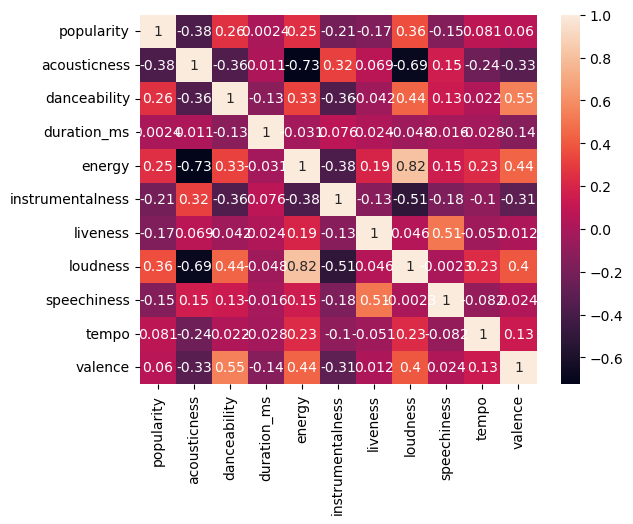

In [255]:
corr = df.corr()
sns.heatmap(corr, annot=True)

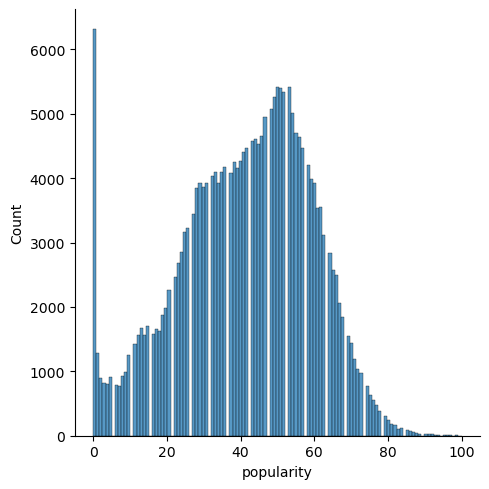

In [256]:
sns.displot(df.popularity)

Text(0.5, 1.0, 'Popularity Based on Key')

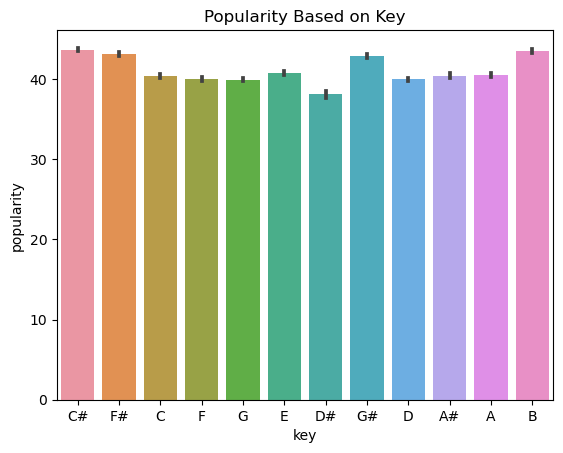

In [257]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

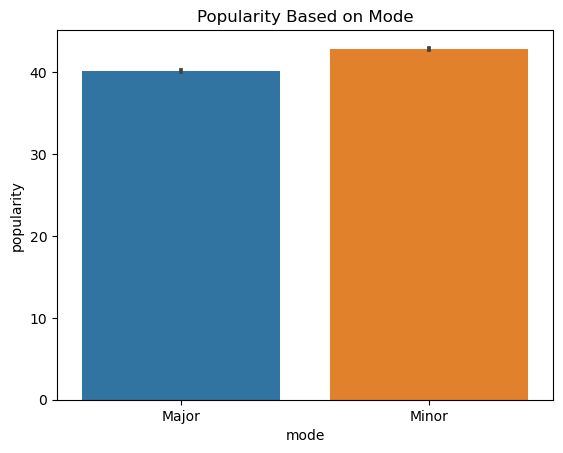

In [258]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')

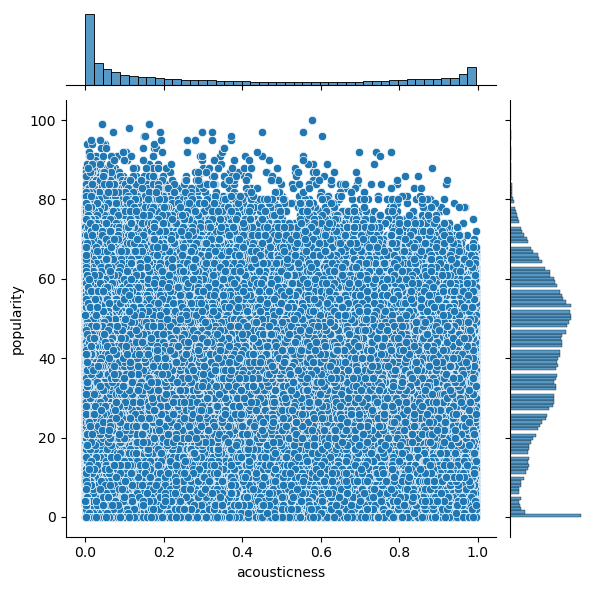

In [259]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = df)

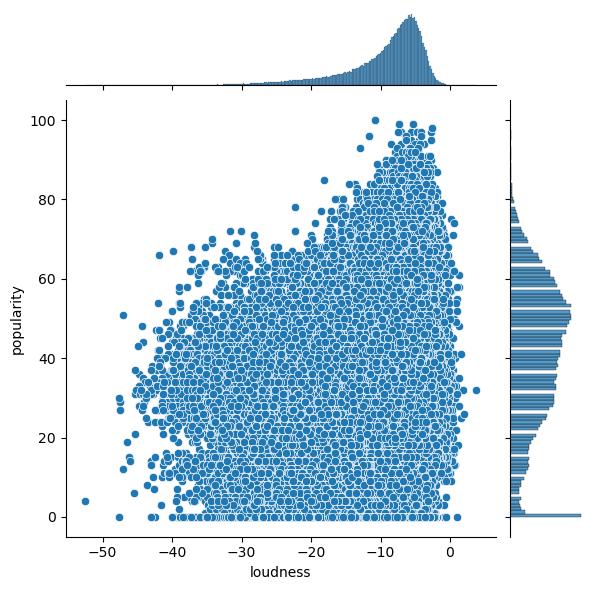

In [260]:
sns.jointplot(x = 'loudness', y = 'popularity', data = df)

In [261]:
#There are 2 variables (key and mode) that need to be converted from text to numbers . We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0.

In [262]:
# Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i
df.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
21364,56,0.00328,0.744,263787.0,0.944,0.014900,3,0.1590,-2.896,Minor,0.1280,127.949,0.584
26212,37,0.00632,0.481,326800.0,0.955,0.023200,7,0.2510,-3.951,Minor,0.2650,149.992,0.126
62950,36,0.61900,0.707,229455.0,0.418,0.000043,2,0.0734,-9.045,Minor,0.0366,102.793,0.682
5658,51,0.00769,0.669,199960.0,0.667,0.000000,5,0.0983,-3.000,Major,0.0511,128.103,0.690
91071,49,0.08950,0.758,240517.0,0.685,0.000000,0,0.3400,-6.013,Major,0.0348,111.088,0.360


In [263]:
#Mode: We will assign major = 1 and minor = 0
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
62465,46,0.13200,0.597,174533.0,0.660,0.0000,5,0.0948,-10.812,0,0.0331,136.283,0.742
26912,40,0.57400,0.431,411133.0,0.677,0.4990,8,0.3670,-6.432,1,0.0458,101.945,0.548
74187,0,0.98300,0.504,200733.0,0.316,0.0658,2,0.1570,-12.983,1,0.0406,142.724,0.306
87061,81,0.06590,0.926,223713.0,0.703,0.0000,11,0.2310,-6.337,0,0.1030,125.022,0.485
53126,26,0.00232,0.406,118440.0,0.984,0.5170,8,0.0951,-2.890,1,0.1310,161.708,0.529


In [264]:
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
135,1,0.08300,0.724,246333.0,0.689,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0.6930
136,1,0.32300,0.685,186467.0,0.610,0.000000,2,0.1020,-5.221,0,0.0439,94.384,0.3230
137,1,0.06750,0.762,199520.0,0.520,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0.0862
138,1,0.36000,0.563,240597.0,0.366,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0.7680
139,1,0.59600,0.653,213947.0,0.621,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230312,1,0.27300,0.833,318800.0,0.661,0.000149,9,0.2940,-7.595,0,0.1010,108.314,0.8580
230782,1,0.04530,0.719,194554.0,0.702,0.000013,11,0.0662,-4.577,1,0.0357,116.938,0.6130
230817,1,0.00862,0.567,163840.0,0.753,0.001830,5,0.1270,-4.823,1,0.0406,120.098,0.5660
230946,1,0.51900,0.775,128973.0,0.725,0.054100,5,0.0944,-8.369,1,0.0944,129.681,0.9140


In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [266]:
features = ["duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence","danceability","acousticness"]

In [267]:
#split the data 80% for training and 20% testing

In [268]:
X = df[features]
y = df.popularity

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)

In [270]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(186180, 11)
(46545, 11)
(186180,)
(46545,)


# Logistic Regression

In [271]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
score = LR.score(X_test, y_test)
print(score)

0.7884842625416264


# Random Forest

In [272]:
RFC_Model = RandomForestClassifier(n_estimators = 50)
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = RFC_Model.score(X_test, y_test)
print(RFC_Accuracy)

0.9372435277688259


# decision tree

In [273]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
y_Predict = DT_Model.predict(X_test)
score = DT_Model.score(X_test, y_test)
print(score)

0.873906971747771


In [ ]:
#Using a dataset of 228,000 Spotify Tracks, we were able to predict popularity  using audio-based metrics such as key, mode, and danceability without external metrics such as artist name, genre, and release date. The Random Forest Classifier was the best performing algorithm with 93.7% accuracy . The Decision Tree Classifier was the second best performing algorithm with 87.3% accuracy .

